<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_2244/NGC_2244_version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [88]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

In [89]:
!pip install astroquery

In [90]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


#### Finding GAIA Data

In [91]:
## making a GAIA cone_search of 30m radius around NGC2244 center

coordinate = coord.SkyCoord.from_name('NGC2244')
print(coordinate)
radius = u.Quantity(0.9, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (98.0822, 4.8642)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [92]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 3131331604634423168,3131331604634423168,328870302,2015.5,98.082940,0.101106,4.860034,0.108790,0.568159,0.121810,4.664320,0.167794,0.201153,-1.860607,0.207614,-0.462255,0.355628,-0.004083,0.072162,-0.554789,-0.042528,0.010692,0.140762,0.043828,-0.433348,107,0,106,1,3.651101,161.373398,0.363783,3.420960e+00,31,False,2.682603,1.493570,0.026710,-0.231987,...,4577.678808,312.886922,14.630458,15.610307,1.671067,0,1.236583,0.229185,1.007398,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.426055,-2.017852,98.487839,-18.341407,102001,5076.000000,4302.174805,6050.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.004224
1,1635721458409799680,Gaia DR2 3131331604634882816,3131331604634882816,1385609433,2015.5,98.077914,10.149317,4.864204,8.706068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.673488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,0,35,0,5.922927,101.728035,14.929342,9.260040e+00,3,False,0.002912,NaN,NaN,-0.290106,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.420042,-2.020374,98.482313,-18.337539,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.004277
2,1635721458409799680,Gaia DR2 3131331604631935360,3131331604631935360,905250481,2015.5,98.082137,0.816337,4.869393,0.941630,-0.866510,1.217280,-0.711841,2.072988,1.608096,-0.613116,1.586653,-0.229633,0.367917,0.002250,0.030574,-0.651033,0.038079,0.129823,0.024100,-0.091780,0.053997,101,0,101,0,2.307858,130.839630,0.000000,0.000000e+00,31,False,0.036955,1.407245,0.224133,-0.118290,...,310.908220,12.314387,25.247561,18.530340,4.721477,0,0.595531,-1.266562,1.862093,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.417375,-2.014248,98.486416,-18.332111,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005199
3,1635721458409799680,Gaia DR2 3131331673351420416,3131331673351420416,1302311662,2015.5,98.079213,0.146521,4.868748,0.168162,0.339352,0.210750,1.610213,-1.855021,0.283286,0.398508,0.279737,-0.341114,0.367450,0.138743,0.104227,-0.640780,-0.135929,0.034152,0.256628,0.122109,-0.283142,113,0,113,0,-0.087336,106.061478,0.000000,0.000000e+00,31,False,1.097896,1.369435,0.037153,-0.189349,...,1722.245250,40.495535,42.529263,16.671682,1.679230,0,1.797209,0.616619,1.180590,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.416604,-2.017131,98.483392,-18.332926,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005444
4,1635721458409799680,Gaia DR2 3131331226674838912,3131331226674838912,401188232,2015.5,98.076929,0.412423,4.86

In [93]:
all_stars[all_stars['parallax_over_error'] > 5]

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
5,1635721458409799680,Gaia DR2 3131331604635171584,3131331604635171584,1576114306,2015.5,98.087176,0.034242,4.861085,0.036322,0.426365,0.039675,10.746410,-0.339045,0.064261,-2.565056,0.066616,-0.498258,0.342073,-0.008619,0.059645,-0.433423,-0.042288,-0.019275,0.193305,0.037874,-0.416900,106,0,106,0,-3.661095,56.934151,0.000000,0.000000e+00,31,False,43.639256,1.603976,0.008947,-0.358113,...,2.605735e+04,41.810091,623.231140,13.722095,1.247340,0,0.894903,0.339058,0.555845,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.427067,-2.013622,98.492211,-18.340108,100001,5410.000000,5131.475098,5799.666504,NaN,NaN,NaN,NaN,NaN,NaN,200111,3.264355,2.840442,3.628336,8.223915,6.475879,9.971951,https://gea.esac.esa.int/data-server/datalink/...,,0.005846
11,1635721458409799680,Gaia DR2 3131331226678059008,3131331226678059008,882526893,2015.5,98.079853,0.052811,4.856004,0.067031,6.996152,0.076533,91.413559,-37.466317,0.112919,1.069213,0.116634,-0.329749,0.202081,-0.045360,-0.067812,-0.648298,-0.169439,0.005738,0.158569,0.052777,-0.354098,140,140,131,9,13.340904,476.971405,0.139940,5.528175e+00,31,False,43.208477,1.568738,0.014402,-0.157206,...,8.277746e+07,827156.632825,100.074707,4.967140,1.198918,0,1.137906,0.527109,0.610797,19.912395,0.139278,7,5000.0,2.5,0.0,NOT_AVAILABLE,206.428215,-2.022439,98.484854,-18.345610,100001,4925.000000,4867.500000,4943.750000,NaN,NaN,NaN,NaN,NaN,NaN,200111,13.757698,13.653539,14.084659,100.325462,98.941032,101.709892,https://gea.esac.esa.int/data-server/datalink/...,,0.008519
31,1635721458409799680,Gaia DR2 3131331222383853696,3131331222383853696,755036904,2015.5,98.072915,0.098616,4.854750,0.104685,0.602137,0.117017,5.145734,-0.183007,0.197255,-0.921509,0.201499,-0.471291,0.370101,0.052051,0.101367,-0.541810,-0.055476,0.046055,0.163133,0.087527,-0.495570,115,0,113,2,11.845930,390.832336,0.516255,1.539621e+01,31,False,2.776122,1.498424,0.022190,-0.249154,...,1.095322e+04,76.896531,142.440994,14.663066,1.370768,0,1.715318,0.775938,0.939380,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.426140,-2.029152,98.477661,-18.347269,100001,4117.780273,3974.000000,4332.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.013225
43,1635721458409799680,Gaia DR2 3131331673351396864,3131331673351396864,864570461,2015.5,98.077690,0.059038,4.879577,0.048143,0.768867,0.067261,11.431165,-1.708743,0.096356,0.196434,0.096438,-0.331153,0.598229,-0.054060,-0.028953,-0.381014,-0.107418,-0.007475,0.116391,0.033952,-0.216575,96,96,96,0,3.763534,150.865265,0.000000,7.348258e-16,31,True,256.056793,1.661512,0.013981,-0.228467,...,1.139332e+05,134.819054,845.082031,12.120295,1.205921,0,0.465026,0.151861,0.313165,NaN,NaN,0,N

In [94]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 5]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


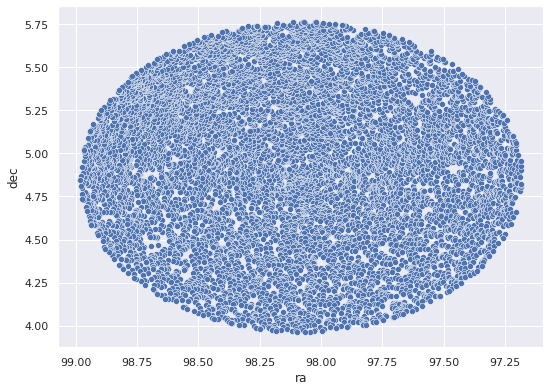

In [95]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot('ra', 'dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()

#### Finding Cantat Data

In [96]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [97]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [98]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [99]:
# help(Vizier)

In [100]:
## saving only NGC 2244 data from Cantat

cantat_2244 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_2244")
cantat_2244 = cantat_2244[0].to_pandas()
cantat_2244

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,98.315200,4.536108,3130554284272036992,0.6074,-1.835,0.051,NaN,17.322500,2.3604,0.6,NGC_2244,98.315208,4.536108
1,98.457159,4.534730,3130556139698030848,0.6572,-1.377,0.032,NaN,15.034100,1.6524,0.9,NGC_2244,98.457165,4.534730
2,98.514262,4.569089,3130558166922576512,0.8257,-1.220,0.288,NaN,16.164101,2.0843,0.7,NGC_2244,98.514267,4.569088
3,98.506642,4.544843,3130556582078192256,0.6101,-1.558,-0.133,NaN,17.848499,2.5816,0.5,NGC_2244,98.506649,4.544844
4,98.248545,4.614187,3130555830460261632,0.2582,-0.307,1.344,NaN,16.274500,1.5222,0.1,NGC_2244,98.248546,4.614181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,97.838267,5.516140,3131975093817653760,0.8877,-1.589,0.239,NaN,14.896100,1.0744,0.5,NGC_2244,97.838274,5.516139
1697,97.711034,5.528785,3131977219820275200,0.8216,-0.366,-0.363,NaN,17.707899,1.8032,0.1,NGC_2244,97.711036,5.528787
1698,97.914338,5.590792,3131981381649718656,0.2708,-0.357,0.033,NaN,16.165501,1.6858,0.2,NGC_2244,97.914339,5.590792
1699,97.787003,5.521287,3131975467473614848,0.4338,-0.547,-0.545,NaN,17.078899,1.5405,0.2,NGC_2244,97.787005,5.521289


In [101]:
# renaming the cantat table to match it with gaia_data
cantat_2244 = cantat_2244.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [102]:
# taking the subset of only source_id and PMemb
cantat_2244 = cantat_2244.loc[:,['source_id', 'PMemb']]


In [103]:
cantat_2244.isnull().sum()

source_id    0
PMemb        0
dtype: int64

In [104]:
# join the two table on source_id
cantat_2244 = all_stars[all_stars['parallax_over_error'] > 5].join(cantat_2244.set_index('source_id'), on='source_id')

In [105]:
cantat_2244.isnull().sum()

solution_id                0
designation                0
source_id                  0
random_index               0
ref_epoch                  0
                        ... 
lum_percentile_upper    4186
datalink_url               0
epoch_photometry_url       0
dist                       0
PMemb                   9708
Length: 98, dtype: int64

In [106]:
cantat_2244.shape

(10550, 98)

In [107]:
cantat_2244.dropna(subset=['PMemb']).shape

(842, 98)

In [108]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_2244 = cantat_2244.dropna(subset=['PMemb'])
cantat_2244

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
31,1635721458409799680,Gaia DR2 3131331222383853696,3131331222383853696,755036904,2015.5,98.072915,0.098616,4.854750,0.104685,0.602137,0.117017,5.145734,-0.183007,0.197255,-0.921509,0.201499,-0.471291,0.370101,0.052051,0.101367,-0.541810,-0.055476,0.046055,0.163133,0.087527,-0.495570,115,0,113,2,11.845930,390.832336,0.516255,1.539621e+01,31,False,2.776122,1.498424,0.022190,-0.249154,...,76.896531,142.440994,14.663066,1.370768,0,1.715318,0.775938,0.939380,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.426140,-2.029152,98.477661,-18.347269,100001,4117.780273,3974.000000,4332.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.013225,0.2
43,1635721458409799680,Gaia DR2 3131331673351396864,3131331673351396864,864570461,2015.5,98.077690,0.059038,4.879577,0.048143,0.768867,0.067261,11.431165,-1.708743,0.096356,0.196434,0.096438,-0.331153,0.598229,-0.054060,-0.028953,-0.381014,-0.107418,-0.007475,0.116391,0.033952,-0.216575,96,96,96,0,3.763534,150.865265,0.000000,7.348258e-16,31,True,256.056793,1.661512,0.013981,-0.228467,...,134.819054,845.082031,12.120295,1.205921,0,0.465026,0.151861,0.313165,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.406288,-2.013486,98.481125,-18.322205,100001,7657.000000,7250.666504,7943.333496,0.9660,0.6033,1.1910,0.5123,0.3267,0.6127,200111,2.087973,1.940156,2.328554,13.501410,11.984966,15.017853,https://gea.esac.esa.int/data-server/datalink/...,,0.016027,0.9
63,1635721458409799680,Gaia DR2 3131330470763817216,3131330470763817216,476216673,2015.5,98.088244,0.049930,4.846540,0.061110,0.399332,0.069773,5.723343,-0.515856,0.106005,-0.009668,0.108648,-0.254570,0.252947,0.182329,0.061312,-0.655453,0.064951,0.264633,-0.017338,-0.102409,-0.224707,114,0,114,0,0.301998,112.836418,0.000000,0.000000e+00,31,False,11.927197,1.514343,0.012720,-0.180014,...,43.478003,213.643814,14.842020,1.326518,1,1.264620,0.498045,0.766575,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.440475,-2.019381,98.494235,-18.354566,100002,4854.000000,4662.120117,5016.100098,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.018651,0.2
79,1635721458409799680,Gaia DR2 3131331638994893696,3131331638994893696,1365720321,2015.5,98.101729,0.049254,4.872959,0.052375,0.743172,0.061977,11.991102,-1.183593,0.098629,0.217506,0.102028,-0.404899,0.398722,0.132649,-0.007230,-0.540134,-0.153832,0.120713,0.176645,0.076325,-0.416915,123,0,123,0,4.627850,203.368378,0.204639,3.643934e+00,31,False,11.376957,1.463482,0.011433,-0.217208,...,130.788356,143.695816,14.076887,1.332573,0,1.601761,0.723952,0.877809,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.423211,-1.995281,98.506723,-18.327400,100001,4343.000000,4076.25

In [109]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_2244.to_csv('NGC_2244_cantat.csv')
# all_stars.to_csv('NGC_2244_Gaia_30m.csv')

In [110]:
cantat_2244.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,8.420000e+02,8.420000e+02,8.420000e+02,842.0,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.0,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,...,839.000000,842.000000,8.390000e+02,839.000000,839.000000,839.000000,839.000000,842.000000,839.000000,839.000000,839.000000,8.000000,8.000000,842.000000,8.000000,8.000000,8.0,842.000000,842.000000,842.000000,842.000000,746.000000,746.000000,746.000000,746.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,552.0,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,842.000000,842.000000
mean,1.635721e+18,3.131414e+18,8.526372e+08,2015.5,98.075045,0.059670,4.971042,0.060757,0.620294,0.069936,10.588640,-1.441908,0.121088,0.165947,0.116174,-0.242519,0.122183,-0.120791,0.186310,-0.366702,0.064573,-0.269360,0.217670,0.128827,-0.205982,130.418052,13.271971,129.720903,0.697150,1.069909,153.458679,0.065193,1.069452,31.0,45.201992,1.494832,0.015016,-0.105533,14.887173,10.064133,...,15.858846,13.418052,1.341285e+05,412.716686,368.438660,14.445944,1.335929,0.043943,1.412903,0.618153,0.794750,56.688883,3.625321,0.048694,5000.000000,3.250000,0.0,206.323810,-1.973616,98.472681,-18.230797,100164.581769,4904.492188,4695.457520,5198.929199,1.535453,1.221615,1.849774,0.768595,0.605457,0.928399,200111.0,3.195610,2.851475,3.460310,21.642056,18.667953,24.616161,0.367228,0.519715
std,0.000000e+00,3.431894e+14,4.889649e+08,0.0,0.267348,0.028892,0.294700,0.029713,0.148842,0.032017,5.307869,0.641468,0.068069,0.678331,0.074456,0.180939,0.205314,0.257116,0.236271,0.192364,0.249022,0.247785,0.171665,0.165270,0.214334,17.433851,37.565776,17.387977,1.167216,3.854476,118.868210,0.122242,4.448417,0.0,84.163567,0.098988,0.006941,0.093733,1.968323,0.891589,...,1.952636,2.391733,9.978954e+05,3086.422030,262.597351,1.613438,0.109690,0.216375,0.509168,0.273719,0.245838,32.447267,5.921502,0.510302,377.964478,0.534522,0.0,0.287881,0.273874,0.280296,0.294790,548.381170,1053.432983,1021.342529,1073.581055,0.687749,0.683173,0.720919,0.351468,0.342863,0.372986,0.0,3.824407,3.447601,4.096987,157.811859,137.856720,177.812332,0.185093,0.291359
min,1.635721e+18,3.130523e+18,5.011500e+05,2015.5,97.337395,0.021028,4.306968,0.021057,0.252601,0.022887,5.002069,-3.448733,0.040685,-1.780996,0.036940,-0.951144,-0.653522,-0.900410,-0.920227,-0.866931,-0.943199,-0.939732,-0.434475,-0.625654,-0.975644,77.000000,0.000000,76.000000,0.00000

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


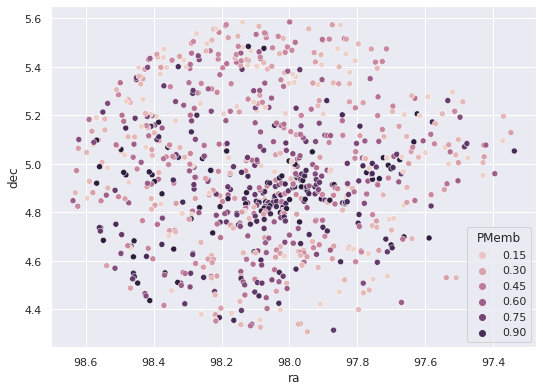

In [111]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_2244['ra'], cantat_2244['dec'], hue = cantat_2244['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [112]:
# import member dataset
member = cantat_2244.copy()

In [113]:
### adding their distance from the center of the clusters

## NGC 2244
center = coord.SkyCoord.from_name('NGC2244')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_2244_center'] = distance

In [114]:
member['PMemb'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb,dist_2244_center
31,1635721458409799680,Gaia DR2 3131331222383853696,3131331222383853696,755036904,2015.5,98.072915,0.098616,4.854750,0.104685,0.602137,0.117017,5.145734,-0.183007,0.197255,-0.921509,0.201499,-0.471291,0.370101,0.052051,0.101367,-0.541810,-0.055476,0.046055,0.163133,0.087527,-0.495570,115,0,113,2,11.845930,390.832336,0.516255,1.539621e+01,31,False,2.776122,1.498424,0.022190,-0.249154,...,142.440994,14.663066,1.370768,0,1.715318,0.775938,0.939380,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.426140,-2.029152,98.477661,-18.347269,100001,4117.780273,3974.000000,4332.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.013225,1,0.013225
43,1635721458409799680,Gaia DR2 3131331673351396864,3131331673351396864,864570461,2015.5,98.077690,0.059038,4.879577,0.048143,0.768867,0.067261,11.431165,-1.708743,0.096356,0.196434,0.096438,-0.331153,0.598229,-0.054060,-0.028953,-0.381014,-0.107418,-0.007475,0.116391,0.033952,-0.216575,96,96,96,0,3.763534,150.865265,0.000000,7.348258e-16,31,True,256.056793,1.661512,0.013981,-0.228467,...,845.082031,12.120295,1.205921,0,0.465026,0.151861,0.313165,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.406288,-2.013486,98.481125,-18.322205,100001,7657.000000,7250.666504,7943.333496,0.966,0.6033,1.1910,0.5123,0.3267,0.6127,200111,2.087973,1.940156,2.328554,13.501410,11.984966,15.017853,https://gea.esac.esa.int/data-server/datalink/...,,0.016027,1,0.016020
63,1635721458409799680,Gaia DR2 3131330470763817216,3131330470763817216,476216673,2015.5,98.088244,0.049930,4.846540,0.061110,0.399332,0.069773,5.723343,-0.515856,0.106005,-0.009668,0.108648,-0.254570,0.252947,0.182329,0.061312,-0.655453,0.064951,0.264633,-0.017338,-0.102409,-0.224707,114,0,114,0,0.301998,112.836418,0.000000,0.000000e+00,31,False,11.927197,1.514343,0.012720,-0.180014,...,213.643814,14.842020,1.326518,1,1.264620,0.498045,0.766575,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.440475,-2.019381,98.494235,-18.354566,100002,4854.000000,4662.120117,5016.100098,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.018651,1,0.018659
79,1635721458409799680,Gaia DR2 3131331638994893696,3131331638994893696,1365720321,2015.5,98.101729,0.049254,4.872959,0.052375,0.743172,0.061977,11.991102,-1.183593,0.098629,0.217506,0.102028,-0.404899,0.398722,0.132649,-0.007230,-0.540134,-0.153832,0.120713,0.176645,0.076325,-0.416915,123,0,123,0,4.627850,203.368378,0.204639,3.643934e+00,31,False,11.376957,1.463482,0.011433,-0.217208,...,143.695816,14.076887,1.332573,0,1.601761,0.723952,0.877809,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.423211,-1.995281,98.506723,-18.327400,100001,4343.000000,4076.253662,4603.200195,3.159,2.8030

In [115]:
### adding their distance from the center of the clusters

## NGC 2244
center = coord.SkyCoord.from_name('NGC2244')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_2244_center'] = distance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


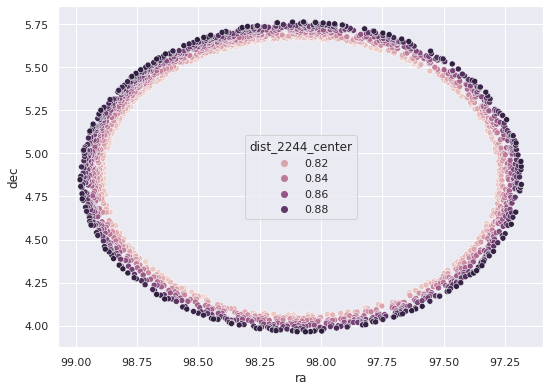

In [116]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot('ra', 'dec', hue = 'dist_2244_center', 
                          data = all_stars_filtered[all_stars_filtered.dist_2244_center >= 0.8])
skyplot.invert_xaxis()

In [117]:
non_member = all_stars_filtered[all_stars_filtered['dist_2244_center'] >= 0.8].sample(len(member))

In [118]:
non_member['PMemb'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_2244_center,PMemb
58654,1635721458409799680,Gaia DR2 3131179562793183488,3131179562793183488,1103587794,2015.5,97.537965,0.093992,4.259020,0.096988,1.329522,0.112254,11.843834,-4.777806,0.182136,-2.322383,0.184141,-0.263094,0.193790,-0.147399,0.276715,-0.389113,0.161467,-0.140378,0.150389,0.134682,-0.271879,132,0,132,0,5.997448,247.526810,0.455053,5.297338,31,False,2.109041,1.484805,0.021916,-0.148778,...,159.663925,15.909792,1.283311,0,1.464500,0.668150,0.796350,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.709066,-2.777050,97.951582,-18.972435,100001,4443.000000,4394.270020,4599.609863,0.2915,0.1330,0.5311,0.138,0.0479,0.2334,200111,0.572342,0.534031,0.585107,0.115004,0.095129,0.134879,https://gea.esac.esa.int/data-server/datalink/...,,0.812747,0.812896,0
68427,1635721458409799680,Gaia DR2 3131562433356001920,3131562433356001920,110876045,2015.5,97.232580,0.145105,5.100212,0.144256,0.990274,0.157681,6.280221,-3.619569,0.280498,-3.686394,0.247152,-0.243025,-0.037317,-0.350056,0.327478,-0.303639,0.223305,-0.486123,0.281877,0.091889,-0.222023,167,0,167,0,1.160980,183.084839,0.000000,0.000000,31,False,0.802377,1.366752,0.038554,-0.069018,...,116.860786,17.104919,1.427158,0,2.119356,1.044104,1.075253,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,205.821403,-2.658442,97.583120,-18.148884,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.878706,0.878550,0
65506,1635721458409799680,Gaia DR2 3131985058141650560,3131985058141650560,1645372362,2015.5,97.959721,0.049201,5.715303,0.049109,1.214765,0.053147,22.856524,9.243221,0.095230,-13.661015,0.084019,-0.386381,-0.093114,-0.434957,0.482223,-0.106400,0.395362,-0.546178,0.446408,0.039072,-0.390588,141,0,135,6,0.049674,130.134338,0.000000,0.000000,31,False,11.680081,1.555094,0.013168,-0.132244,...,379.927826,14.995848,1.242960,0,1.186821,0.518704,0.668117,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,205.610156,-1.732262,98.306670,-17.494752,100001,4913.000000,4829.500000,4967.257324,0.2530,0.1492,0.3881,0.124,0.0780,0.1949,200111,0.766395,0.749743,0.793125,0.308309,0.278922,0.337696,https://gea.esac.esa.int/data-server/datalink/...,,0.859803,0.859784,0
56967,1635721458409799680,Gaia DR2 3130491783908052864,3130491783908052864,573885819,2015.5,98.715088,0.027459,4.370913,0.028032,2.574354,0.036139,71.234329,-0.196434,0.050439,-2.955110,0.044268,-0.247054,0.263972,-0.120250,0.316306,-0.416545,0.047004,-0.450549,0.439777,0.238634,-0.090070,150,0,150,0,-5.213285,72.685722,0.000000,0.000000,31,False,48.391716,1.530547,0.007009,-0.088365,...,387.252380,13.528921,1.235545,0,1.192642,0.528895,0.663747,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,207.150699,-1.683635,99.182906,-18.790987,100001,5014.700195,4899.317383,5218

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


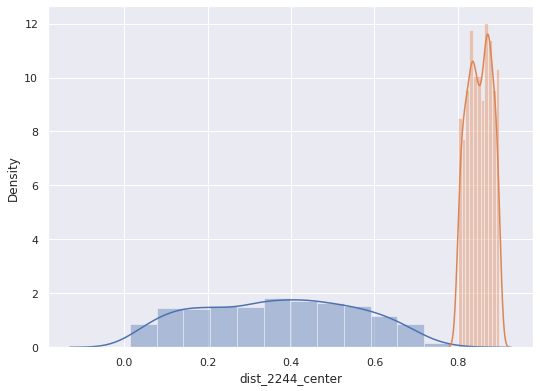

In [119]:
sns.distplot(member['dist_2244_center'])
sns.distplot(non_member['dist_2244_center'])

In [120]:
training_data = pd.concat([member, non_member])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


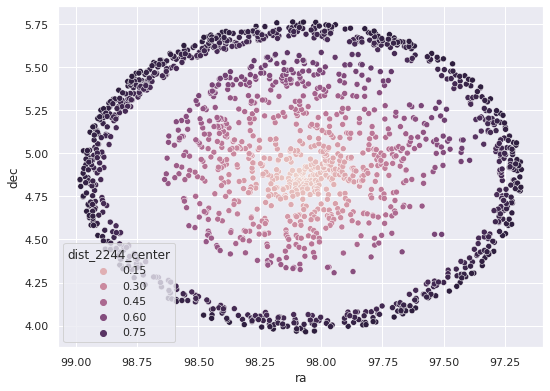

In [121]:
skyplot = sns.scatterplot('ra', 'dec', hue = 'dist_2244_center', 
                          data = training_data)
skyplot.invert_xaxis()

In [122]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_2244_center
count,1.684000e+03,1.684000e+03,1.684000e+03,1684.0,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.0,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,...,1684.000000,1.674000e+03,1674.000000,1674.000000,1674.000000,1674.000000,1684.000000,1674.000000,1674.000000,1674.000000,38.000000,38.000000,1684.000000,38.000000,38.000000,38.000000,1684.000000,1684.000000,1684.000000,1684.000000,1363.000000,1363.000000,1363.000000,1363.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,1064.0,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1684.000000,1684.000000,1684.000000
mean,1.635721e+18,3.131371e+18,8.465626e+08,2015.5,98.113450,0.070427,4.971427,0.071601,0.943271,0.083757,14.400877,-0.910293,0.143763,-1.871930,0.137188,-0.202962,0.087663,-0.132426,0.184368,-0.367608,0.076628,-0.278616,0.198578,0.151273,-0.199226,131.897268,10.615202,131.185867,0.711401,1.179920,183.779617,0.093805,2.357700,31.0,38.361198,1.486839,0.018433,-0.093590,15.064133,10.135392,...,13.502375,8.506763e+04,243.706264,361.071899,14.768373,1.326013,0.058195,1.467257,0.665056,0.802200,32.936131,2.949019,0.103325,5493.420898,3.526316,-0.078947,206.341006,-1.939421,98.512726,-18.227626,100097.905356,4900.071289,4707.193848,5186.811523,1.106037,0.855602,1.377181,0.552770,0.423799,0.68891,200111.0,2.546430,2.271375,2.753113,13.239546,11.414839,15.064250,0.609509,0.500000,0.609487
std,0.000000e+00,4.503514e+14,4.938229e+08,0.0,0.469885,0.053273,0.465105,0.054118,0.980617,0.063783,15.381305,5.460890,0.114715,7.689219,0.113588,0.173375,0.181281,0.224489,0.209956,0.172366,0.214488,0.212541,0.174690,0.151648,0.201908,16.883460,34.481670,16.820269,1.186611,5.831497,572.517944,0.214433,23.044870,0.0,78.507248,0.103608,0.014544,0.087354,1.903350,0.853893,...,2.412213,7.149282e+05,2199.021926,271.708527,1.651859,0.113082,0.251315,0.533766,0.306814,0.239452,31.148058,4.090030,0.729654,674.052917,0.603451,0.339441,0.449954,0.482954,0.490567,0.467334,429.493366,939.302734,914.646118,965.413025,0.785224,0.730953,0.836927,0.396378,0.364646,0.42625,0.0,3.482785,3.092488,3.773341,114.713020,100.165604,129.300369,0.276134,0.500149,0.276122
min,1.635721e+18,3.130406e+18,5.011500e+05,2015.5,97.184156,0.020169,3.964490,0.019718,0.217858,0.022811,5.002069,-126.159211,0.040303,-159.765662,0.035720,-0.979202,-0.653522,-0.900410,-0.920227,-0.866931,

In [123]:
# correlation of PMemb with other variables
training_data.corr().PMemb.dropna().sort_values()

dist_2244_center               -0.877674
dist                           -0.877665
rv_template_teff               -0.383088
parallax                       -0.329459
parallax_over_error            -0.247923
                                  ...   
e_bp_min_rp_val                 0.470841
a_g_val                         0.472896
e_bp_min_rp_percentile_upper    0.485850
a_g_percentile_upper            0.488294
PMemb                           1.000000
Name: PMemb, Length: 90, dtype: float64

In [124]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['PMemb']

In [125]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,1684.000000,1684.000000,1684.000000
mean,0.943272,-0.910293,-1.871929
std,0.980617,5.460891,7.689219
min,0.217858,-126.159210,-159.765656
25%,0.579754,-1.892621,-2.449516
50%,0.696772,-1.325086,-0.189134
75%,0.944765,-0.266107,0.552618
max,16.923079,89.796013,54.473186


In [126]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


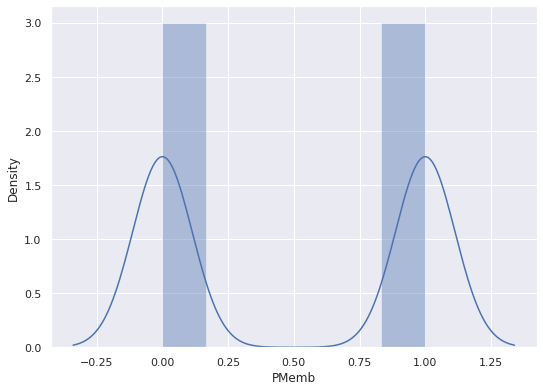

In [127]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [128]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

842

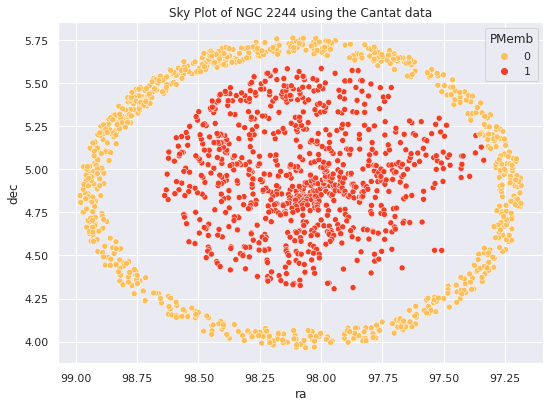

In [129]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'PMemb', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of NGC 2244 using the Cantat data')
plt.show()

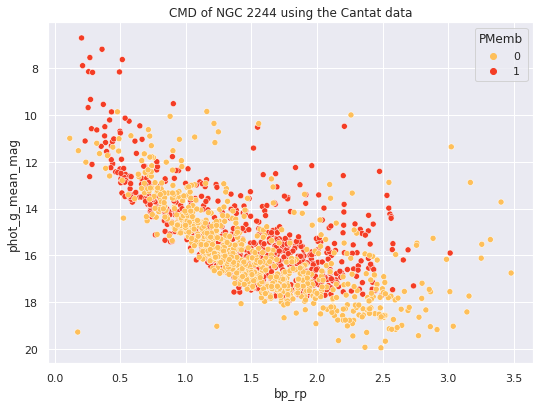

In [130]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
cmd.invert_yaxis()
plt.title('CMD of NGC 2244 using the Cantat data')
plt.show()

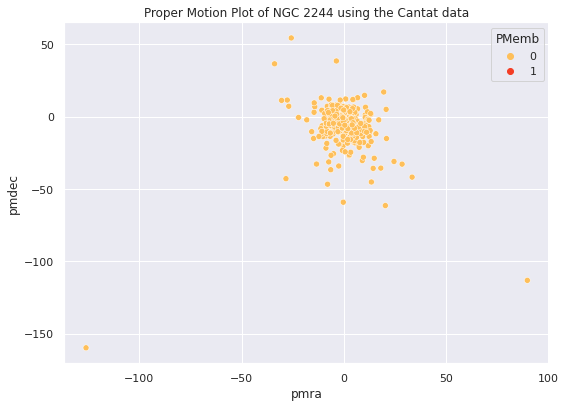

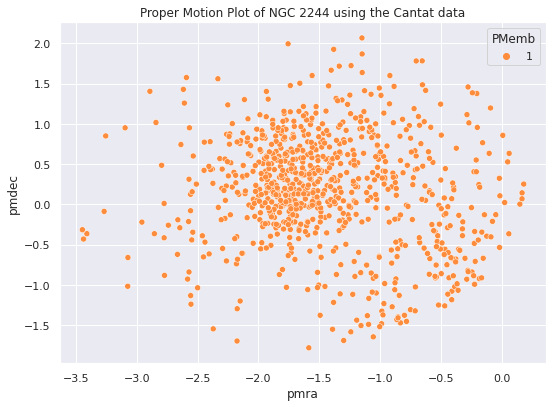

In [131]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', hue = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of NGC 2244 using the Cantat data')
plt.show()
pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', hue = 'PMemb', data = member)
plt.title('Proper Motion Plot of NGC 2244 using the Cantat data')
plt.show()

In [132]:
# Use Random Forest on whole dataset using 100 different trees 
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [133]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmdec       0.594950
pmra        0.205586
parallax    0.199464
dtype: float64

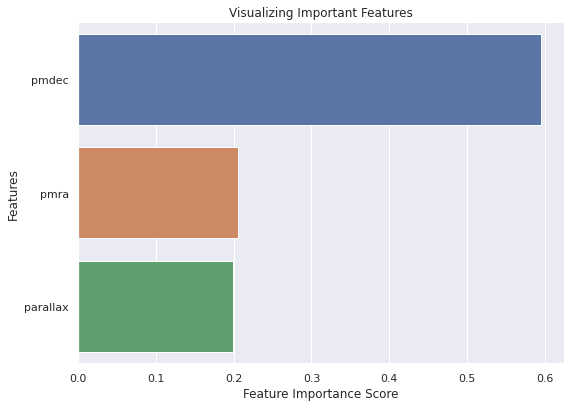

In [134]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [135]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [136]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [137]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [138]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.7223078328940763

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


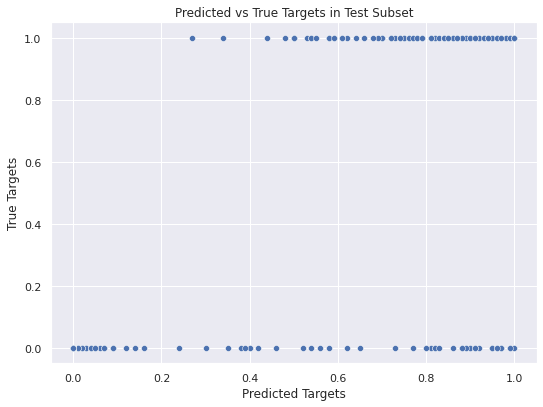

In [139]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [140]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [141]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  for iter in range(20):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfr.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfr.predict(test_features)
    accuracy += rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy/20)

print(accuracy_rate)

[0.5900958348902685, 0.6437636999526445, 0.66293163234199, 0.6829348699668649, 0.6981156316051295, 0.7034125813289333, 0.7100711360010584, 0.7148406757049807, 0.7211118828659966, 0.719992057062091, 0.7240559647208655, 0.7327155864401041, 0.7191792057327477, 0.7277576173686225, 0.7271314095394124, 0.7265731557579074, 0.7415936395807956, 0.7332705727811686, 0.757037005914823]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


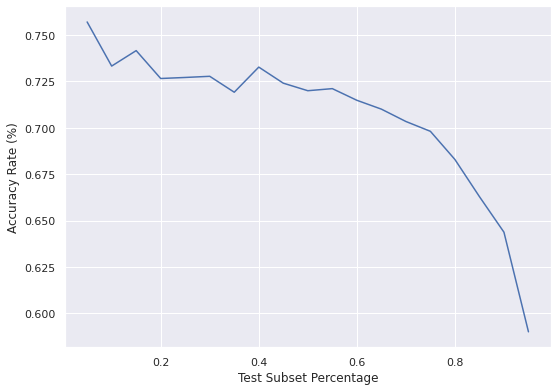

In [142]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [143]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_2244_center
count,1.055000e+04,1.055000e+04,1.055000e+04,10550.0,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000,10550.0,10550.000000,10549.000000,10549.000000,10550.000000,10550.000000,10550.000000,...,10470.000000,10550.000000,1.047000e+04,1.047000e+04,10470.000000,10470.000000,10470.000000,10550.000000,10470.000000,10470.000000,10470.000000,355.000000,355.000000,10550.000000,355.000000,355.000000,355.000000,10550.000000,10550.000000,10550.000000,10550.000000,7682.000000,7682.000000,7682.000000,7682.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,6364.0,6364.000000,6364.000000,6364.000000,6364.000000,6364.000000,6364.000000,10550.000000,10550.000000
mean,1.635721e+18,3.131341e+18,8.601532e+08,2015.5,98.116992,0.083996,4.937264,0.084979,1.210209,0.098693,17.438574,0.031054,0.169303,-3.781687,0.160029,-0.184675,0.069228,-0.159288,0.211141,-0.356805,0.109041,-0.301487,0.197311,0.137380,-0.176315,135.309858,9.614502,134.574597,0.735261,1.317620,208.642746,0.138093,3.277592,31.0,33.675201,1.473145,0.021929,-0.077320,15.447583,10.238389,...,16.546576,13.731659,8.137015e+04,4.029771e+02,361.597321,15.030796,1.354909,0.065687,1.515710,0.677811,0.837903,29.580643,2.576352,0.153460,5433.802734,3.474648,-0.079577,206.372986,-1.952041,98.518600,-18.261598,100069.282218,4857.125000,4676.629883,5136.296387,0.870957,0.651784,1.118085,0.433274,0.322422,0.557542,200111.0,2.161901,1.931828,2.329235,7.496181,6.486304,8.506049,0.594302,0.594287
std,0.000000e+00,4.551313e+14,4.894364e+08,0.0,0.445357,0.077636,0.444581,0.078084,1.173980,0.091395,20.503906,7.040581,0.160510,8.834000,0.157898,0.175013,0.169589,0.211316,0.198754,0.167542,0.203436,0.195812,0.166982,0.148365,0.190873,16.639936,34.040297,16.573340,1.219629,6.614259,1162.349854,0.323779,41.593468,0.0,75.218330,0.103455,0.020009,0.083469,1.868167,0.815264,...,2.020155,2.499812,1.661433e+06,1.580460e+04,284.032043,1.671295,0.177638,0.271829,0.527224,0.308785,0.251198,30.236296,3.457714,0.887477,679.750122,0.586504,0.324666,0.432301,0.455925,0.465462,0.446295,363.059956,795.839844,786.442200,815.364502,0.715737,0.668965,0.759542,0.359996,0.333771,0.385234,0.0,4.460514,3.993535,4.827045,87.023949,74.123169,100.076096,0.218775,0.218765
min,1.635721e+18,3.130406e+18,1.130840e+05,2015.5,97.182644,0.018101,3.964490,0.017840,0.172618,0.020520,5.000254,-145.470946,0.0

In [144]:
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)

In [145]:
# select the set of predictor variables from the new dataset
new_features = all_stars_filtered.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [146]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [147]:
# estimate the membership probability of the stars
all_stars_filtered['PMemb'] = rfr.predict(new_features)
sum(all_stars_filtered['PMemb'] >= 0.5)

1438

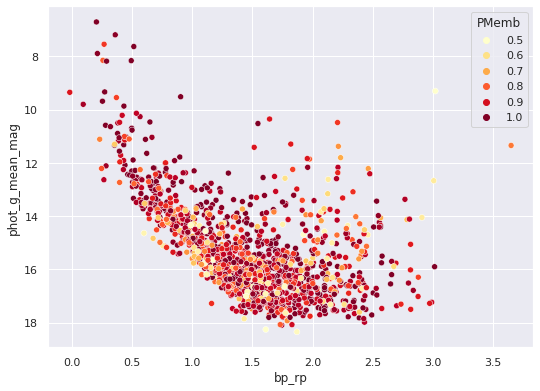

In [148]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )
cmd.invert_yaxis()

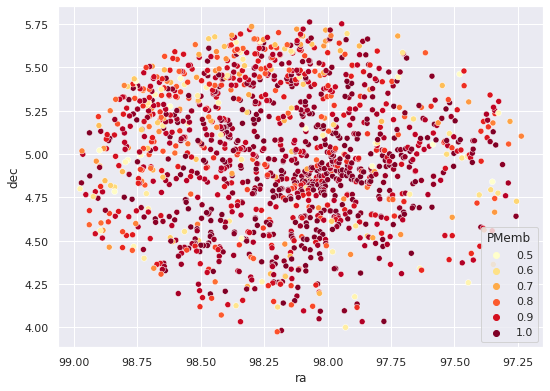

In [149]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

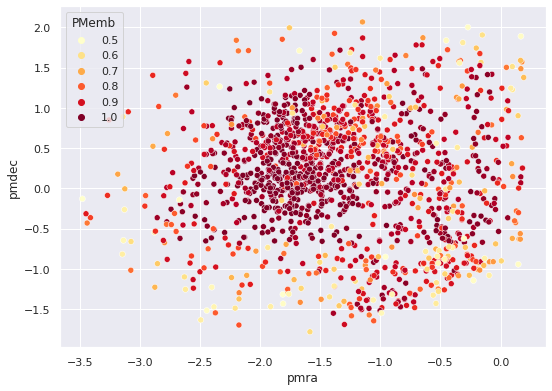

In [150]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )

In [151]:
potentialMember = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5]
len(potentialMember)

1438

In [152]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_2244_center,PMemb
count,1.438000e+03,1.438000e+03,1.438000e+03,1438.0,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.0,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,...,1438.000000,1.432000e+03,1432.000000,1432.000000,1432.000000,1432.000000,1438.000000,1432.000000,1432.000000,1432.000000,23.000000,23.000000,1438.000000,23.000000,23.000000,23.0,1438.000000,1438.000000,1438.000000,1438.000000,1255.000000,1255.000000,1255.000000,1255.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,917.0,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,1438.000000,1438.000000,1438.000000
mean,1.635721e+18,3.131382e+18,8.509502e+08,2015.5,98.187087,0.059261,4.990952,0.059790,0.612542,0.069088,10.637157,-1.337783,0.119773,0.148004,0.113372,-0.201129,0.098857,-0.137869,0.192696,-0.361144,0.086888,-0.284305,0.198454,0.132477,-0.179647,133.655772,11.223227,132.958971,0.696801,1.100812,160.259567,0.069939,1.229498,31.0,39.060146,1.488226,0.015163,-0.085801,15.267038,10.205146,...,13.719054,9.589287e+04,301.634445,371.412567,14.578411,1.330892,0.050765,1.460640,0.655019,0.805619,57.809453,2.781433,0.080668,4989.130371,3.304348,0.0,206.357557,-1.865351,98.588705,-18.204076,100115.790438,4824.433105,4624.858398,5125.059570,1.564131,1.275298,1.864212,0.782563,0.632390,0.936461,200111.0,3.395283,3.017504,3.663161,19.796915,16.722069,22.871784,0.504259,0.504237,0.903554
std,0.000000e+00,4.237323e+14,4.810305e+08,0.0,0.370266,0.028728,0.383616,0.029275,0.163666,0.032323,5.720697,0.710320,0.063918,0.755527,0.067687,0.180311,0.183071,0.226119,0.208241,0.171102,0.217813,0.211802,0.161905,0.149044,0.198025,17.467349,35.931538,17.379240,1.160053,4.175352,150.509171,0.123785,5.298963,0.0,77.923943,0.096520,0.007171,0.090783,1.965509,0.841876,...,2.390322,7.786086e+05,2506.176865,256.369873,1.543118,0.102415,0.231924,0.521192,0.296232,0.236023,26.836759,4.086145,0.672888,491.277679,0.634950,0.0,0.375272,0.377551,0.387537,0.384328,465.271715,984.207092,959.988647,998.406494,0.716767,0.721324,0.744576,0.365145,0.362733,0.384014,0.0,6.466346,5.984242,6.715035,146.305466,123.476143,169.543640,0.236213,0.236193,0.117966
min,1.635721e+18,3.130406e+18,1.275950e+05,2015.5,97.236516,0.021028,3.974905,0.019374,0.187316,0.022887,5.002069,-3.478786,0.040685,-1.780996,0.036040,-0.973839,-0.653522,-0.955504,-0.920227,-0.866931,-0.943199,-0.974185,-0.4344

In [153]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_2244_center
count,8.420000e+02,8.420000e+02,8.420000e+02,842.0,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.0,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,...,842.000000,8.390000e+02,839.000000,839.000000,839.000000,839.000000,842.000000,839.000000,839.000000,839.000000,8.000000,8.000000,842.000000,8.000000,8.000000,8.0,842.000000,842.000000,842.000000,842.000000,746.000000,746.000000,746.000000,746.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,552.0,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,842.000000,842.0,842.000000
mean,1.635721e+18,3.131414e+18,8.526372e+08,2015.5,98.075045,0.059670,4.971042,0.060757,0.620294,0.069936,10.588640,-1.441908,0.121088,0.165947,0.116174,-0.242519,0.122183,-0.120791,0.186310,-0.366702,0.064573,-0.269360,0.217670,0.128827,-0.205982,130.418052,13.271971,129.720903,0.697150,1.069909,153.458679,0.065193,1.069452,31.0,45.201992,1.494832,0.015016,-0.105533,14.887173,10.064133,...,13.418052,1.341285e+05,412.716686,368.438660,14.445944,1.335929,0.043943,1.412903,0.618153,0.794750,56.688883,3.625321,0.048694,5000.000000,3.250000,0.0,206.323810,-1.973616,98.472681,-18.230797,100164.581769,4904.492188,4695.457520,5198.929199,1.535453,1.221615,1.849774,0.768595,0.605457,0.928399,200111.0,3.195610,2.851475,3.460310,21.642056,18.667953,24.616161,0.367228,1.0,0.367214
std,0.000000e+00,3.431894e+14,4.889649e+08,0.0,0.267348,0.028892,0.294700,0.029713,0.148842,0.032017,5.307869,0.641468,0.068069,0.678331,0.074456,0.180939,0.205314,0.257116,0.236271,0.192364,0.249022,0.247785,0.171665,0.165270,0.214334,17.433851,37.565776,17.387977,1.167216,3.854476,118.868210,0.122242,4.448417,0.0,84.163567,0.098988,0.006941,0.093733,1.968323,0.891589,...,2.391733,9.978954e+05,3086.422030,262.597351,1.613438,0.109690,0.216375,0.509168,0.273719,0.245838,32.447267,5.921502,0.510302,377.964478,0.534522,0.0,0.287881,0.273874,0.280296,0.294790,548.381170,1053.432983,1021.342529,1073.581055,0.687749,0.683173,0.720919,0.351468,0.342863,0.372986,0.0,3.824407,3.447601,4.096987,157.811859,137.856720,177.812332,0.185093,0.0,0.185077
min,1.635721e+18,3.130523e+18,5.011500e+05,2015.5,97.337395,0.021028,4.306968,0.021057,0.252601,0.022887,5.002069,-3.448733,0.040685,-1.780996,0.036940,-0.951144,-0.653522,-0.900410,-0.920227,-0.866931,-0.943199,-0.939732,-0.434475,-0.625654,-0.975644,77.000000,0.000000,76.000000,0.000000,-5.659819,46.3

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


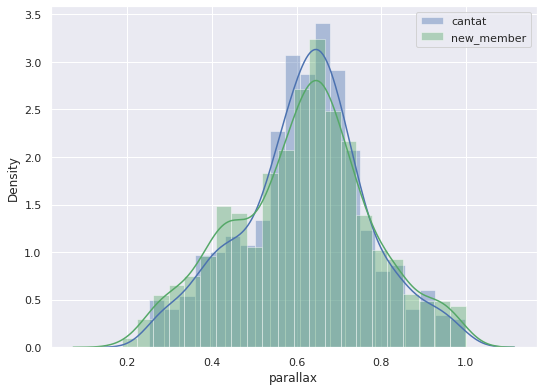

In [154]:
sns.distplot(member['parallax'], color = 'b', label = 'cantat', kde=True)
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', kde=True)
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


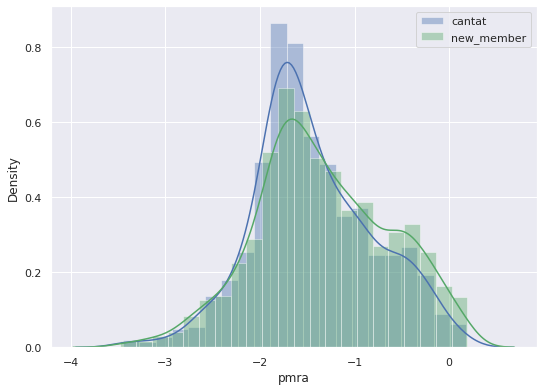

In [155]:
sns.distplot(member['pmra'], color = 'b', label = 'cantat')
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


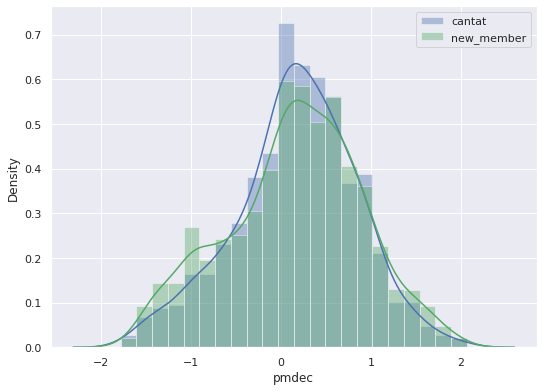

In [156]:
sns.distplot(member['pmdec'], color = 'b', label = 'cantat')
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member')
plt.legend()
plt.show()

In [157]:
# saving the files as csv
# all_stars.to_csv('gaia_2244_membership_prob.csv')

potentialMember.to_csv('NGC_2244_membership_prob.csv')


### Comparing the new and old probable members

In [158]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [159]:
concatenated

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_2244_center,PMemb,dataset
31,1635721458409799680,Gaia DR2 3131331222383853696,3131331222383853696,755036904,2015.5,98.072915,0.098616,4.854750,0.104685,0.602137,0.117017,5.145734,-0.183007,0.197255,-0.921509,0.201499,-0.471291,0.370101,0.052051,0.101367,-0.541810,-0.055476,0.046055,0.163133,0.087527,-0.495570,115,0,113,2,11.845930,390.832336,0.516255,1.539621e+01,31,False,2.776122,1.498424,0.022190,-0.249154,...,14.663066,1.370768,0,1.715318,0.775938,0.939380,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.426140,-2.029152,98.477661,-18.347269,100001,4117.780273,3974.000000,4332.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.013225,0.013225,0.71,New_member
43,1635721458409799680,Gaia DR2 3131331673351396864,3131331673351396864,864570461,2015.5,98.077690,0.059038,4.879577,0.048143,0.768867,0.067261,11.431165,-1.708743,0.096356,0.196434,0.096438,-0.331153,0.598229,-0.054060,-0.028953,-0.381014,-0.107418,-0.007475,0.116391,0.033952,-0.216575,96,96,96,0,3.763534,150.865265,0.000000,7.348258e-16,31,True,256.056793,1.661512,0.013981,-0.228467,...,12.120295,1.205921,0,0.465026,0.151861,0.313165,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.406288,-2.013486,98.481125,-18.322205,100001,7657.000000,7250.666504,7943.333496,0.9660,0.6033,1.1910,0.5123,0.3267,0.6127,200111,2.087973,1.940156,2.328554,13.501410,11.984966,15.017853,https://gea.esac.esa.int/data-server/datalink/...,,0.016027,0.016020,1.00,New_member
63,1635721458409799680,Gaia DR2 3131330470763817216,3131330470763817216,476216673,2015.5,98.088244,0.049930,4.846540,0.061110,0.399332,0.069773,5.723343,-0.515856,0.106005,-0.009668,0.108648,-0.254570,0.252947,0.182329,0.061312,-0.655453,0.064951,0.264633,-0.017338,-0.102409,-0.224707,114,0,114,0,0.301998,112.836418,0.000000,0.000000e+00,31,False,11.927197,1.514343,0.012720,-0.180014,...,14.842020,1.326518,1,1.264620,0.498045,0.766575,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.440475,-2.019381,98.494235,-18.354566,100002,4854.000000,4662.120117,5016.100098,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.018651,0.018659,0.82,New_member
79,1635721458409799680,Gaia DR2 3131331638994893696,3131331638994893696,1365720321,2015.5,98.101729,0.049254,4.872959,0.052375,0.743172,0.061977,11.991102,-1.183593,0.098629,0.217506,0.102028,-0.404899,0.398722,0.132649,-0.007230,-0.540134,-0.153832,0.120713,0.176645,0.076325,-0.416915,123,0,123,0,4.627850,203.368378,0.204639,3.643934e+00,31,False,11.376957,1.463482,0.011433,-0.217208,...,14.076887,1.332573,0,1.601761,0.723952,0.877809,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.423211,-1.995281,98.506723,-18.327400,100001,4343.000000,4076.253662,4603.200195,3.1590,2.8030,3.3465,1.6100,1.4199

In [160]:
concatenated.dataset.value_counts()

New_member    1438
Old_member     842
Name: dataset, dtype: int64

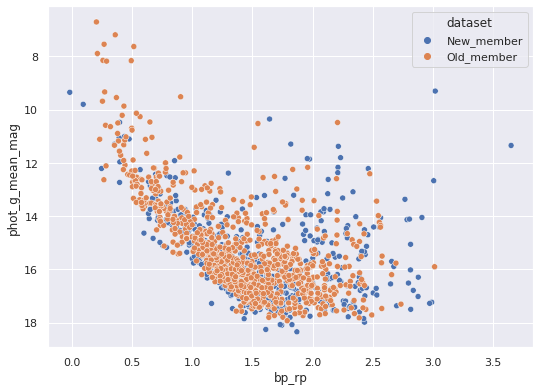

In [161]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

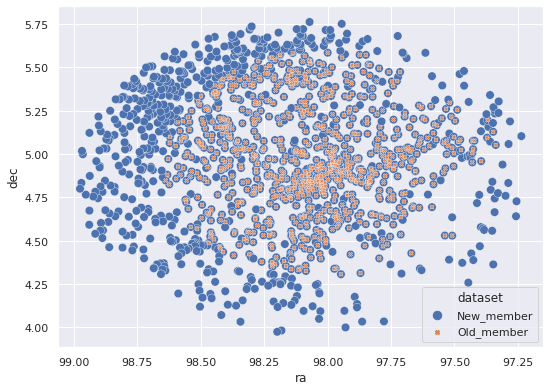

In [162]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='dataset', hue='dataset', style = 'dataset')
skyplot.invert_xaxis()

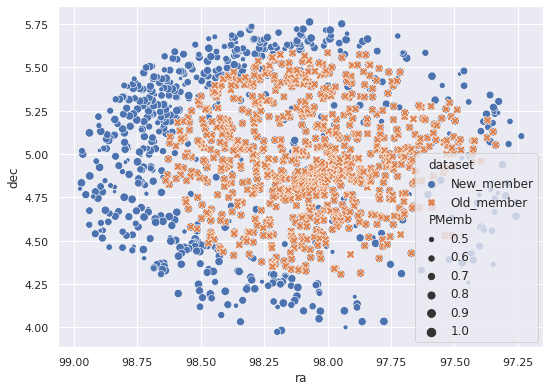

In [163]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='PMemb', hue='dataset', style = 'dataset')
skyplot.invert_xaxis()

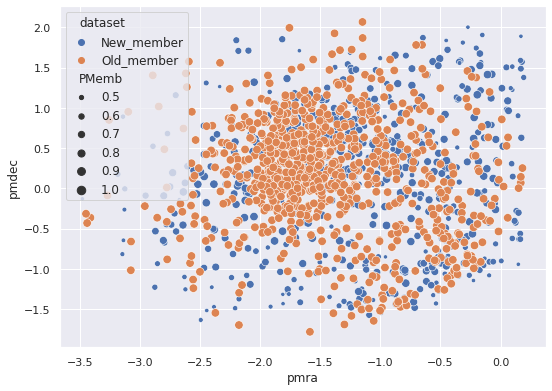

In [164]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                size='PMemb', hue='dataset')

In [165]:
# pd_prof.ProfileReport(potentialMember)

In [166]:
#files.download('NGC_2244_cantat.csv')

files.download('NGC_2244_membership_prob.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


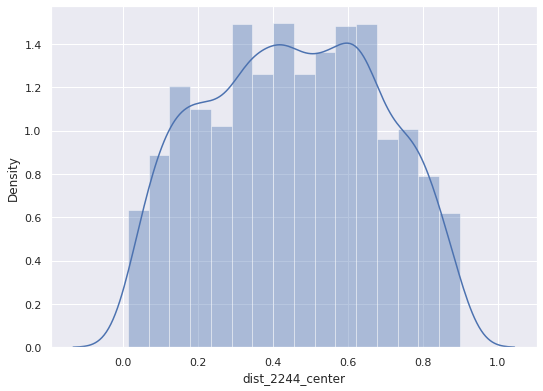

In [167]:
sns.distplot(concatenated['dist_2244_center'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


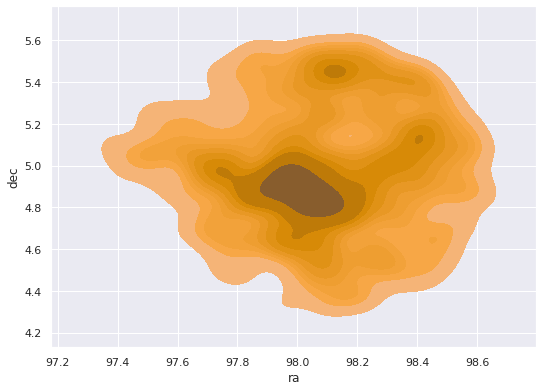

In [168]:
sns.kdeplot('ra', 'dec', data = member, shade=True, color = 'orange', bw = 0.20)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


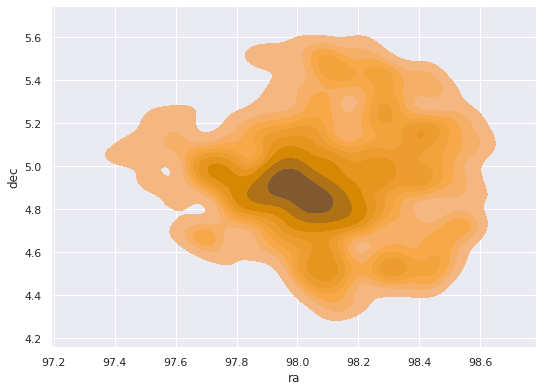

In [169]:
sns.kdeplot('ra', 'dec', data = cantat_2244[cantat_2244['PMemb'] >= 0.5], shade=True, color = 'orange', bw = 0.20)

In [170]:
len(cantat_2244[cantat_2244['PMemb'] >= 0.5])

456

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


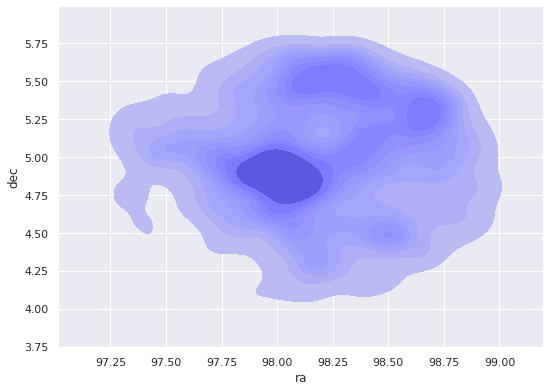

In [171]:
sns.kdeplot('ra', 'dec', data = potentialMember, shade=True, color = 'blue', bw = 0.20)

In [172]:
potentialMember['radial_velocity'].dropna()

5452     102.430723
11289     33.928069
12162     44.449059
14630     52.860143
17903     50.115588
19781     92.047044
23715     93.494782
23940     26.062137
24629     52.696495
27135     36.765842
27936     79.877337
38233     59.615439
39453     86.020762
46874     20.291837
48465     59.053013
49825     12.068161
50848     55.779490
57934     79.513907
59353     40.239304
64788    108.011488
65335     61.194360
66856     56.828200
67728     26.274246
Name: radial_velocity, dtype: float64

In [173]:
member['radial_velocity'].dropna()

5452     102.430723
17903     50.115588
23715     93.494782
23940     26.062137
24629     52.696495
27135     36.765842
27936     79.877337
49825     12.068161
Name: radial_velocity, dtype: float64

In [174]:
member['radial_velocity_error'].dropna()

5452     17.379816
17903     1.077036
23715     0.646042
23940     0.435425
24629     1.247715
27135     0.506245
27936     6.614726
49825     1.095561
Name: radial_velocity_error, dtype: float64